# 在绘图中显示日期数据

## 1. 日期转换

要在 matplotlib 中显示正确的日期信息, 需要明确的设置 `datetime.datetime` 或 `datetime.date` 类型数据, 这就牵扯到需要将数据中的其它类型数据转为 `datetime.datetime` 或 `datetime.date` 类型数据

由于本例中通过 `np.loadtxt` 函数从文本中加载数据, 并绘制曲线, 故下面的函数用于产生日期从 `2018-01-01` 到 `2022-12-31` 之间每一天一条的数据集, 即每条数据包含一个日期格式字符串和与该日期对应的一个浮点数格式字符串 (浮点数为随机数), 通过 `,` 分隔

通过 `matplot.convert` 模块的 `bytespdate2num` 函数可以将一个字符串 (`str`, `bytes` 或 `bytearray`) 转换为数值 (`float`), 该数值为字符串表示日期的时间戳

另外, 通过 `matplot.convert` 模块的 `date2num` 函数可以将一个数值类型时间戳 (`float`) 转为 `datetime.datetime` 类型对象

In [7]:
import random
import numpy as np

import matplotlib.dates as mdates

from matplot.convert import bytespdate2num


def mock_lines_data() -> list[str]:
    """构造测试数据

    Returns:
        `list[str]`: 测试数据列表
    """
    # 随机产生阶段最大值
    max_ = random.randint(100, 300)

    # 随机产生阶段最小值
    value = min_ = random.randint(max_ // 2, max_)

    # 增长值
    n = 1

    lines: list[str] = []

    # 遍历指定日期区间, 为每一天产生一条数据
    for d in np.arange(bytespdate2num("2018-01-01"), bytespdate2num("2022-12-31")):
        # 产生日期数据
        date_n = mdates.num2date(d)

        # 产生一条数据
        lines.append(f"{date_n},{value}")

        # 根据数据增长情况, 定义下阶段数据范围
        if value > max_:
            n = -1
            min_ = random.randint(0, max_)
        elif value < min_:
            n = 1
            max_ = random.randint(200, 300)

        # 令数据产生变化
        value += n

    return lines

通过 `mock_lines_data` 函数产生的文本数据集, 对每一行数据通过 `,` 分隔符拆分后, 得到两个值, 第一个值为日期格式字符串, 第二个值为浮点数格式字符串

通过 `np.loadtxt` 函数读取上述文本数据集, 并将其转为**两组数值集合**, 包括:

- 通过日期格式表示的数据产生 `data` 数据集合, 该数据通过 `bytespdate2num` 函数将字符串转为数值
- 通过浮点数格式表示的数据产生 `value` 数据集合, 该数据会自动从字符串转为数值

通过 `matplotlib.dates` 模块中的 `num2date` 函数可以将数值类型转为日期类型, 并将其设置为 `plt.plot` 函数的 X 轴参数

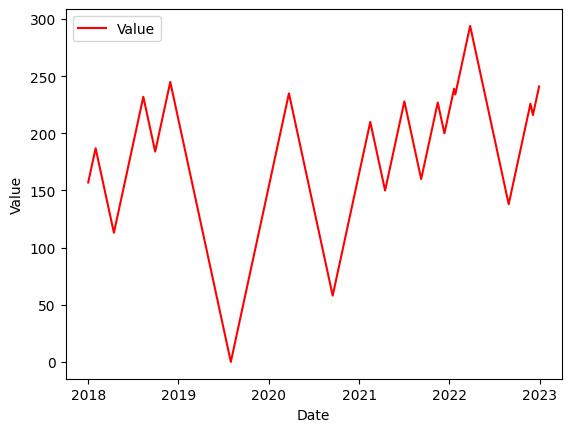

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplot.convert import bytespdate2num


lines = mock_lines_data()

# 读取数据, 每条数据用 "," 分割, 产生 date 和 value 两组数据
# data 为 float 类型, 为表示时间的时间戳值
# value 为 float 类型, 为表示数据的值
# 通过 `bytespdate2num` 函数作为第 1 个数据 (`data`) 的转换函数
# 第 2 个数据使用默认的字符串转数值方法
date, value = np.loadtxt(
    lines,
    delimiter=",",  # 设置分割符
    unpack=True,  # 返回多个变量
    converters={
        0: bytespdate2num,  # 设定第 1 个数据对应的转换函数, 将日期转为数值
    },
)

# 设置 x 和 y 坐标轴的标签
plt.xlabel("Date")
plt.ylabel("Value")

# 绘制日期折线图
plt.plot(
    [mdates.num2date(d) for d in date],  # 通过 `num2date` 函数将数值转为日期对象
    value,  # 数据
    "r-",  # 绘图格式, 绘制实线
    label="Value",
)

# 绘制图例
plt.legend()

# 显示绘图
plt.show()